In [1]:
# WLA normal distribution and standard normal distribution
#
# Created by: Washington Alto
# Date: Apr 1, 2022

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
# Functions used to plot
def standardize(x,mean,std):
    return (x-mean)/std

def plot_point(axes,x,y,color):
    axes.text(x,y,'({x:.2f},{y:.2f})'.format(x=x,y=y))
    axes.plot(x,y, marker="o", markersize=5, markerfacecolor=color)
    return None

def plot_fill_between(axes,x,y,color):
    axes.text(x[0],y[0],'({x:.2f},{y:.2f})'.format(x=x[0],y=y[0]))
    axes.plot(x[0],y[0], marker="o", markersize=5, markerfacecolor='black')
    axes.text(x[-1],y[-1],'({x:.2f},{y:.2f})'.format(x=x[-1],y=y[-1]))
    axes.plot(x[-1],y[-1], marker="o", markersize=5, markerfacecolor='black')
    axes.fill_between(x,y,color=color,alpha=0.25)
    return None

def plot_vline(axes,x,f,f_mean,f_std,linecolor):
    y = f(x,f_mean,f_std)
    axes.text(x,y,'({x:.2f},{y:.2f})'.format(x=x,y=y))
    axes.plot(x,y, marker="o", markersize=5, markerfacecolor='black')
    axes.axvline(x,ls='--',color=linecolor,label='x={x}'.format(x=x))
    return None


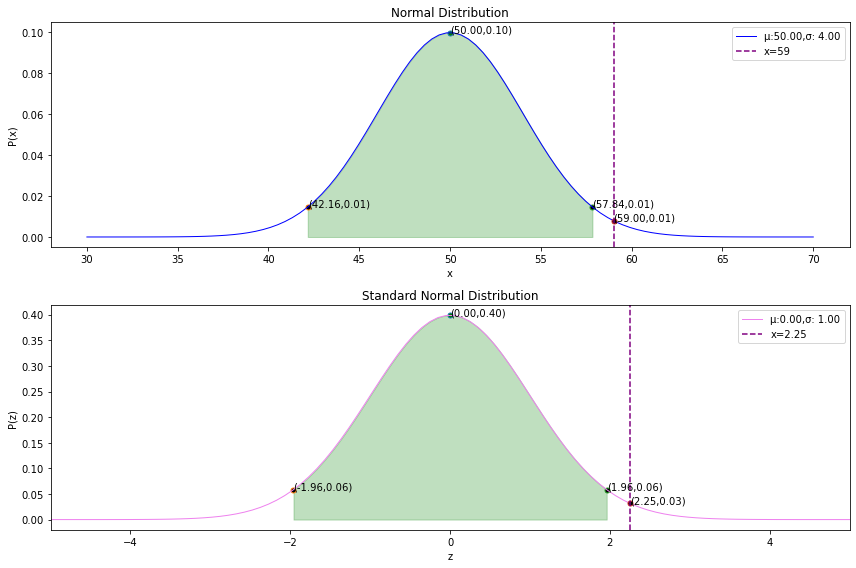

In [3]:
# Parameters for the curve
x_min = 30.0
x_max = 70.0

mean = 50.0 
std = 4.0

alpha=0.05

x_sel = 59

# --------- Do not edit below this line ---------
# Plot curve routines 
x = np.linspace(x_min, x_max, 100)
y = stats.norm.pdf(x,mean,std)
y_mean = stats.norm.pdf(mean,mean,std)

x_thresh1 = stats.norm.ppf(alpha/2,mean,std)
x_thresh2 = stats.norm.ppf(1-(alpha/2),mean,std)
x_thresh = np.linspace(x_thresh1, x_thresh2, 100)
y_thresh = stats.norm.pdf(x_thresh,mean,std)
z_thresh = standardize(x_thresh,mean,std)
zy_thresh = stats.norm.pdf(z_thresh,0,1)

fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
axes[0].set_title('Normal Distribution')
axes[0].set_xlabel('x')
axes[0].set_ylabel('P(x)')
plot_point(axes[0],mean,y_mean,"green")
plot_fill_between(axes[0],x_thresh,y_thresh,'green')
axes[0].plot(x,y,color='blue',linewidth=1,label='μ:{mean:.2f},σ: {std:.2f}'.format(mean=mean,std=std))
plot_vline(axes[0],x_sel,stats.norm.pdf,mean,std,'purple')
_ = axes[0].legend()


z = standardize(x,mean,std)
z_sel = standardize(x_sel,mean,std)
z_min = standardize(x_min,mean,std)
z_max = standardize(x_max,mean,std)
zy_std = stats.norm.pdf(z,0,1)
zy_mean = stats.norm.pdf(0,0,1)

axes[1].set_title('Standard Normal Distribution')
axes[1].set_xlabel('z')
axes[1].set_ylabel('P(z)')
axes[1].set_xlim(z_min,z_max)
plot_point(axes[1],0,zy_mean,"green")
plot_fill_between(axes[1],z_thresh,zy_thresh,'green')
axes[1].plot(z,zy_std,color='violet',linewidth=1,label='μ:{mean:.2f},σ: {std:.2f}'.format(mean=0,std=1))
plot_vline(axes[1],z_sel,stats.norm.pdf,0,1,'purple')
_ = axes[1].legend()

plt.tight_layout()